<a href="https://colab.research.google.com/github/Abhi-nav0506/Capstone-EDA-Hotel-Booking/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
#Import package
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hotel_df = pd.read_csv('/content/drive/MyDrive/EDA_capstone/Copy of Hotel Bookings.csv')
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [16]:
pd.set_option('display.max_columns', None)

In [4]:
# there are 119390 records in the dataset.

In [5]:
# checking columns present in the dataset

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## **INSPECTING NULL VALUES:** ##

In [6]:
# 31 columns.

# columns that have null values are 10. children , 13. country , agent, company

# company column seems to have most null values, checking that

### **1. 'company' column:** ###

In [7]:
#checking unique values of 'company' column, because it seems that this must be some sort of categorical column:

print(hotel_df['company'].unique())
print('Company unique values: ',len(hotel_df['company'].unique()))

[ nan 110. 113. 270. 178. 240. 154. 144. 307. 268.  59. 204. 312. 318.
  94. 174. 274. 195. 223. 317. 281. 118.  53. 286.  12.  47. 324. 342.
 373. 371. 383.  86.  82. 218.  88.  31. 397. 392. 405. 331. 367.  20.
  83. 416.  51. 395. 102.  34.  84. 360. 394. 457. 382. 461. 478. 386.
 112. 486. 421.   9. 308. 135. 224. 504. 269. 356. 498. 390. 513. 203.
 263. 477. 521. 169. 515. 445. 337. 251. 428. 292. 388. 130. 250. 355.
 254. 543. 531. 528.  62. 120.  42.  81. 116. 530. 103.  39.  16.  92.
  61. 501. 165. 291. 290.  43. 325. 192. 108. 200. 465. 287. 297. 490.
 482. 207. 282. 437. 225. 329. 272.  28.  77. 338.  72. 246. 319. 146.
 159. 380. 323. 511. 407. 278.  80. 403. 399.  14. 137. 343. 346. 347.
 349. 289. 351. 353.  54.  99. 358. 361. 362. 366. 372. 365. 277. 109.
 377. 379.  22. 378. 330. 364. 401. 232. 255. 384. 167. 212. 514. 391.
 400. 376. 402. 396. 302. 398.   6. 370. 369. 409. 168. 104. 408. 413.
 148.  10. 333. 419. 415. 424. 425. 423. 422. 435. 439. 442. 448. 443.
 454. 

'company' column has 6797 column filled with 353 unique values, which means that these are unique company ids and the ones with 'NaN' values mean that no company was involved in that booking. 
 It would make sense to fill it with -1 or 0 since it is a categorical feature, not numerical.

### **2. '*agent*' column:** ###

In [8]:
#agent

print('Unique agent values: ',hotel_df['agent'].unique())
print('-----------------------------------------------------')
print('Total unique agent values: ',len(hotel_df['agent'].unique()))

Unique agent values:  [ nan 304. 240. 303.  15. 241.   8. 250. 115.   5. 175. 134. 156. 243.
 242.   3. 105.  40. 147. 306. 184.  96.   2. 127.  95. 146.   9. 177.
   6. 143. 244. 149. 167. 300. 171. 305.  67. 196. 152. 142. 261. 104.
  36.  26.  29. 258. 110.  71. 181.  88. 251. 275.  69. 248. 208. 256.
 314. 126. 281. 273. 253. 185. 330. 334. 328. 326. 321. 324. 313.  38.
 155.  68. 335. 308. 332.  94. 348. 310. 339. 375.  66. 327. 387. 298.
  91. 245. 385. 257. 393. 168. 405. 249. 315.  75. 128. 307.  11. 436.
   1. 201. 183. 223. 368. 336. 291. 464. 411. 481.  10. 154. 468. 410.
 390. 440. 495. 492. 493. 434.  57. 531. 420. 483. 526. 472. 429.  16.
 446.  34.  78. 139. 252. 270.  47. 114. 301. 193. 182. 135. 350. 195.
 352. 355. 159. 363. 384. 360. 331. 367.  64. 406. 163. 414. 333. 427.
 431. 430. 426. 438. 433. 418. 441. 282. 432.  72. 450. 180. 454. 455.
  59. 451. 254. 358. 469. 165. 467. 510. 337. 476. 502. 527. 479. 508.
 535. 302. 497. 187.  13.   7.  27.  14.  22.  17.  28.

'agent' column has 103050 values filled with 334 unique values, which means that these are unique agent ids and the ones with 'NaN' values mean that no agent was involved in that booking. 
It would make sense to fill it with -1 or 0 since it is a categorical feature, not numerical.

### **3. '*children*' column:** ###

In [9]:
hotel_df[hotel_df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


These records have children as NaN and these are also cancelled bookings so these values would be replaced by 0.

### **4. '*country*' column:** ###

In [10]:
print('List of Countries: ', hotel_df['country'].unique())
print('-----------------------------------------------------')
print('Total no of countries: ',len(hotel_df['country'].unique()))

List of Countries:  ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' 'ISL' 'UZB'
 'NPL' 'BHS' 'MAC' 'TGO' 'TWN' 'DJI' 'STP' 'KNA' 'ETH' 'IRQ' 'HND' 'RWA'
 'KHM' 'MCO' 'BGD' 'IMN' 'TJK' 'NIC' 'BEN' 'VGB' 'TZA' 'GAB' 'GHA' 'TMP'
 'GLP' 'KEN' 'LIE' 'GNB' 'MNE' 'UMI' 'MYT' 'FRO' 'MMR' 'PAN' 'BFA' 'LBY'
 'MLI' 'NAM' 'BOL' 'PRY' 'BRB' 'AB

In [11]:
# records with 'country' as NaN
hotel_df[hotel_df['country'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65908,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65909,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
65910,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


There are 488 records that do not have country mentioned, so this will be replaced by 'Unknown'.

### **Replacing Null values:** ###

In [5]:
# REPLACING NaN VALUES OF 4 COLUMNS:

hotel_df.company.fillna(0, inplace=True)               #company
hotel_df.agent.fillna(0, inplace=True)                 #agent
hotel_df.children.fillna(0, inplace=True)              #children
hotel_df.country.fillna('Unknown', inplace=True)       #country

In [13]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# **EXPLORATORY DATA ANALYSIS:** #

Before doing basic analysis, some feature extraction needs to be done first regarding Dates, duration of customer staying (week+weekend) and total kids (children+babies)

In [6]:
from datetime import datetime
hotel_df['arrival_date'] = hotel_df['arrival_date_day_of_month'].astype(str) +'-' +hotel_df['arrival_date_month'].astype(str) +'-' +hotel_df['arrival_date_year'].astype(str) #combining indivdual date elements together
hotel_df['arrival_date'] = pd.to_datetime(hotel_df['arrival_date']) #convreting to datetime.
hotel_df['arrival_month_year'] = hotel_df['arrival_date'].dt.to_period('M') #extracting year-month

hotel_df['total_nights'] = hotel_df['stays_in_weekend_nights'] + hotel_df['stays_in_week_nights'] 
hotel_df['kids'] = hotel_df['children'] + hotel_df['babies']

In [7]:
# duration of interest:

print('The time duration (year-month) of our dataset is from: ' ,hotel_df['arrival_month_year'].min(),' to ',hotel_df['arrival_month_year'].max()) 

The time duration (year-month) of our dataset is from:  2015-07  to  2017-08


In [8]:
# UNIQUE HOTEL NAMES

print('The Hotels of interest in our dataset are: ',hotel_df['hotel'].unique())

The Hotels of interest in our dataset are:  ['Resort Hotel' 'City Hotel']


In [9]:
# CONFIRMED AND CANCELLED BOOKINGS IN OUR DATASET

print('Confirmed Bookings: ', hotel_df[hotel_df['is_canceled'] == 0].shape[0])
print('Cancelled Booking: ',  hotel_df[hotel_df['is_canceled'] == 1].shape[0])

Confirmed Bookings:  75166
Cancelled Booking:  44224


In [129]:
# CREATING SEPERATE DATASETS FOR CONFIRMED AND CANCELED BOOKINGS:

hotel_confirmed_df = hotel_df[hotel_df['is_canceled'] == 0].copy()  #confirmed bookings
hotel_canceled_df = hotel_df[hotel_df['is_canceled'] == 1].copy()   #cancelled bookings

In [133]:
hotel_confirmed_df.shape[0]

75166

In [11]:
# top 20 overall country wise CONFIRMED count

top_20_confirmed_df = hotel_confirmed_df.groupby('country').size().sort_values(ascending=False).reset_index().rename(columns={0:'Confirmed Bookings'}).head(20)
top_20_confirmed_df

,country,Confirmed Bookings
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


In [13]:
# top 20 overall country wise CANCELED count

hotel_canceled_df.groupby('country').size().sort_values(ascending=False).reset_index().rename(columns={0:'Canceled Bookings'}).head(20)

,country,Canceled Bookings
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
5,DEU,1218
6,IRL,832
7,BRA,830
8,USA,501
9,BEL,474


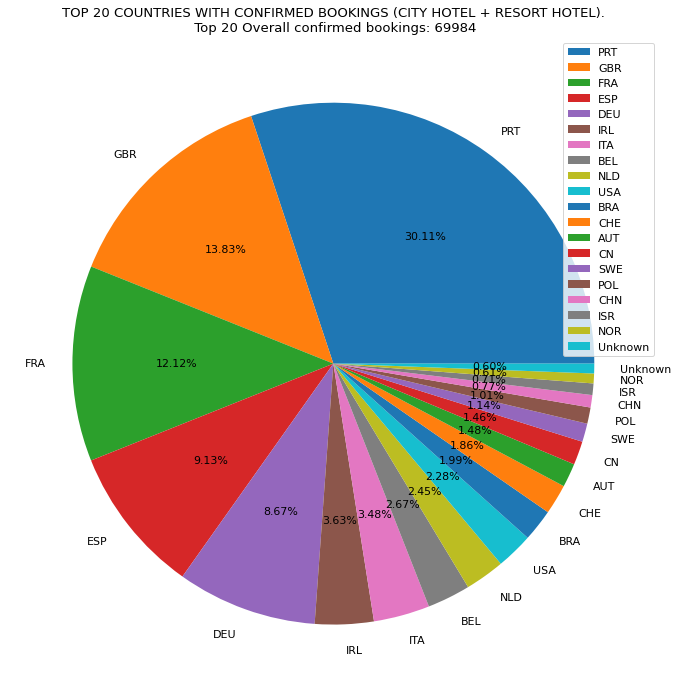

In [101]:
# PLOTTING TOP 20 COUNTRIES WITH HIGHEST CONFIRMED BOOKINGS ON PIE CHART.

plt.figure(figsize = (25,12))
mpl.rcParams['font.size'] = 11
plt.pie(top_20_confirmed_df['Confirmed Bookings'], labels = top_20_confirmed_df['country'],autopct='%1.2f%%')
plt.legend()
title='TOP 20 COUNTRIES WITH CONFIRMED BOOKINGS (CITY HOTEL + RESORT HOTEL).\n Top 20 Overall confirmed bookings: ' + str(top_20_confirmed_df['Confirmed Bookings'].sum())
plt.title(title)
plt.show() 

* From the top 20 confirmed booking count (69984) we see that Portugal (PRT) is covering 30.11 % and next to that is Britain (GBR) ~ 14 % which is less than half of PRT, which confirms that 'City Hotel' and 'Resort Hotel' are located in PORTUGAL.

In [91]:
#Portuguese retention rate city hotel
prt_city_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]

print('City Hotel Portuguese nationals retention rate is: ',round(prt_city_retention*100,2),'%')

#Portuguese retention rate resort hotel
prt_resort_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'Resort Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & ((hotel_confirmed_df['hotel'] == 'Resort Hotel'))].shape[0]

print('Resort Hotel Portuguese nationals retention rate is: ',round(prt_resort_retention*100,2),'%')

print('-'*65)

#Foreign retention rate city hotel
non_prt_city_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]

print('City Hotel non-Portuguese nationals retention rate is: ',round(non_prt_city_retention*100,2),'%')

#Foreign retention rate resort hotel
non_prt_resort_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'Resort Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] != 'PRT') & (hotel_confirmed_df['hotel'] == 'Resort Hotel')].shape[0]

print('Resort Hotel non-Portuguese nationals retention rate is: ',round(non_prt_resort_retention*100,2),'%')

City Hotel Portuguese nationals retention rate is:  12.28 %
Resort Hotel Portuguese nationals retention rate is:  13.62 %
-----------------------------------------------------------------
City Hotel non-Portuguese nationals retention rate is:  0.72 %
Resort Hotel non-Portuguese nationals retention rate is:  1.49 %


In [112]:
prt_city_retention = hotel_confirmed_df[(hotel_confirmed_df['country'] == 'GBR') & (hotel_confirmed_df['is_repeated_guest'] == 1) & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]/hotel_confirmed_df[(hotel_confirmed_df['country'] == 'PRT') & (hotel_confirmed_df['hotel'] == 'City Hotel')].shape[0]

print('City Hotel French nationals retention rate is: ',round(prt_city_retention*100,2),'%')

City Hotel French nationals retention rate is:  0.13 %


In [ ]:


hotel_confirmed_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'arrival_month_year', 'total_nights', 'kids'],
      dtype='object')

In [76]:
hotel_confirmed_df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,6))

ax[0].bar(market_segment[market_segment['hotel'] == 'City Hotel']['customer_type'], market_segment[market_segment['hotel'] == 'City Hotel']['customer_type_count'])
ax[0].set_xlabel('Customer Type')

ax[1].bar(market_segment[market_segment['hotel'] == 'Resort Hotel']['customer_type'], market_segment[market_segment['hotel'] == 'Resort Hotel']['customer_type_count'])
ax[1].set_xlabel('Customer Type')

Text(0.5, 1.0, 'Market segment wise confirmed bookings.')

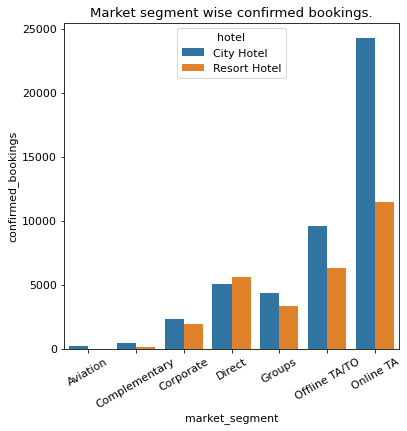

In [115]:
# market segmentation

market_segment_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','market_segment']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'})


plt.figure(figsize = (6,6))
mpl.rcParams['font.size'] = 11
sns.barplot(x = 'market_segment', y='confirmed_bookings', 
               hue = 'hotel',data=market_segment_df).set_xticklabels(market_segment['market_segment'] ,rotation=30)
plt.title('Market segment wise confirmed bookings.')

Text(0.5, 1.0, 'Money deposit wise "confirmed" bookings.')

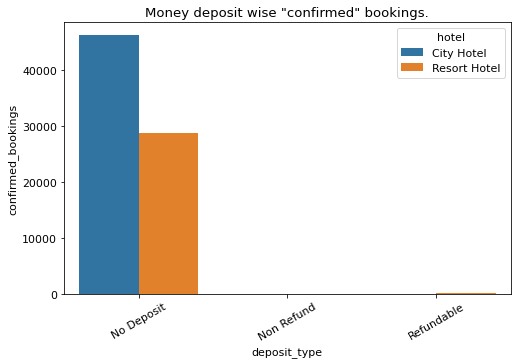

In [132]:
deposit_type_confirmed_df = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','deposit_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'confirmed_bookings'})

plt.figure(figsize = (8,5))
sns.barplot(x = 'deposit_type', y='confirmed_bookings', 
               hue = 'hotel',data=deposit_type_confirmed_df).set_xticklabels(deposit_type_confirmed_df['deposit_type'],rotation=30)

plt.title('Money deposit wise "confirmed" bookings.')

Text(0.5, 1.0, 'Money deposit wise "canceled" bookings.')

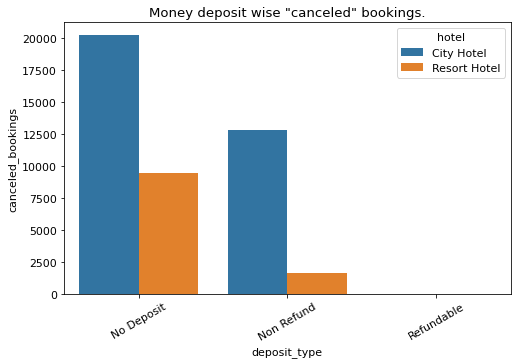

DURATION OF STAY

ROOM TYPE

Text(0.5, 1.0, 'Alloted Room Type')

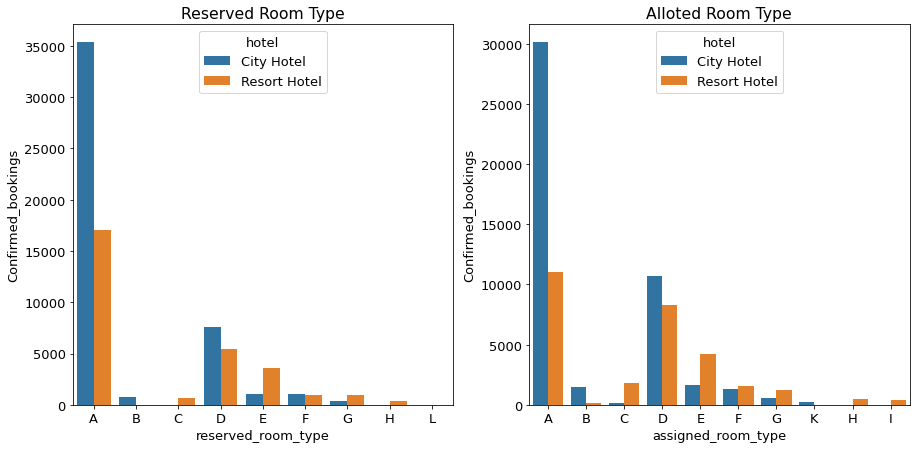

In [107]:
reserved_room = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','reserved_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'Confirmed_bookings'})

assigned_room = pd.DataFrame(hotel_confirmed_df.groupby(['hotel','assigned_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'Confirmed_bookings'})

fig, axes1 = plt.subplots(1,2, figsize=(15,7))

mpl.rcParams['font.size'] = 13

sns.barplot(x = 'reserved_room_type', y='Confirmed_bookings', 
               hue = 'hotel',data=reserved_room,ax=axes1[0]) #.set_xticklabels( rotation=30)
axes1[0].set_title('Reserved Room Type')

sns.barplot(x = 'assigned_room_type', y='Confirmed_bookings', 
               hue = 'hotel',data=assigned_room ,ax=axes1[1]) #.set_xticklabels(rotation=30)
axes1[1].set_title('Alloted Room Type')

* From the 'reserved' room type bar plot we can see that there is a very high demand of room type 'A' for both 'City' and 'Resort Hotel', ~35000 and ~17000 respectively.

* But not everyone is getting room type 'A' which we can see from 'assigned' room type bar plot where, room type 'A' confirmed bookings are ~30000 for 'City Hotel' and ~12000 for 'Resort Hotel'.

* The remaining are alloted some other rooms, and we can see that majority of that are assigned room type 'D', 

  with assigned room 'D' increasing to ~12000 for 'City Hotel' from ~7000 (in reserved room bar plot) and for 'Resort Hotel' bookings for room type 'D' increases slighly to ~8000 from ~5000 (in reserved room bar plot).

Text(0.5, 1.0, 'Resort Hotel')

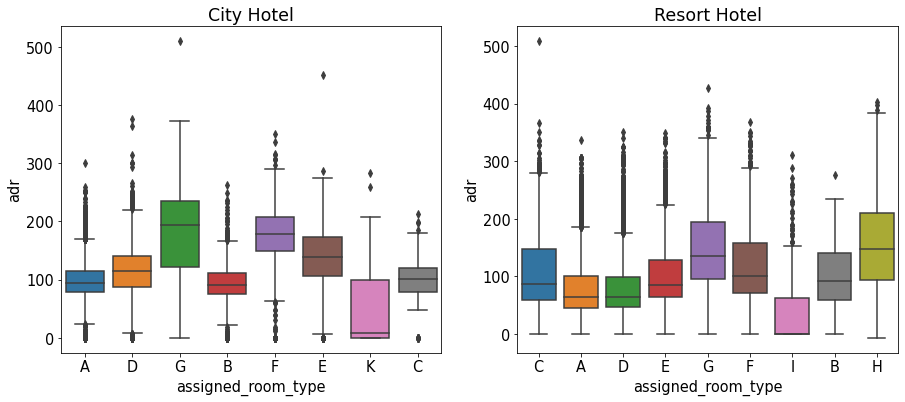

In [75]:
fig, axes1 = plt.subplots(1,2, figsize=(15,6))
sns.boxplot(x="assigned_room_type", y="adr", data=hotel_confirmed_df[hotel_confirmed_df['hotel']=='City Hotel'],ax=axes1[0])
axes1[0].set_title('City Hotel')
sns.boxplot(x="assigned_room_type", y="adr", data=hotel_confirmed_df[hotel_confirmed_df['hotel']=='Resort Hotel'],ax=axes1[1])
axes1[1].set_title('Resort Hotel')

**Observations from '*assigned_room_type*' vs '*adr*' box-plot**:

* * For '**CITY HOTEL**', from bar plots we saw, rooms 'A' and 'D' are alloted the most. The Median Avergae Daily rate of room 'D' is slightly higher than room type 'A'. 
  Room type 'G','F','E' have considerably higher median ADR, which is an indicator of those being high end rooms.

* * For '**RESORT HOTEL**' also, from bar plots we saw, rooms 'A' and 'D' are  alloted the most. The Median Avergae Daily rate of room 'D' is similar to that of room type 'A'. 
  Room type 'G' & 'H' have considerably higher median ADR, which is an indicator of those being high end rooms. Room types 'C','E','F','B' lie somewhat between ['A','D'] and ['G','H'].

In [46]:
hotel_confirmed_df.groupby(['hotel','market_segment']).agg({'days_in_waiting_list':{'mean','median','min','max'},'is_canceled':'count'})

days_in_waiting_list                         \
                                             min       mean  max median   
hotel        market_segment                                               
City Hotel   Aviation                          0   0.000000    0    0.0   
             Complementary                     0   0.073222   35    0.0   
             Corporate                         0   0.163326   15    0.0   
             Direct                            0   0.008735   23    0.0   
             Groups                            0  11.484835  379    0.0   
             Offline TA/TO                     0   5.103510  224    0.0   
             Online TA                         0   0.003669   89    0.0   
Resort Hotel Complementary                     0   0.023810    4    0.0   
             Corporate                         0   0.097549   50    0.0   
             Direct                            0   0.077906  122    0.0   
             Groups                            0   5.267400  185    0.0   
             Offline TA/TO                     0   0.278971   65    0.0   
             Online TA                         0   0.000000    0    0.0   

                            is_canceled  
                                  count  
hotel        market_segment              
City Hotel   Aviation               185  
             Complementary          478  
             Corporate             2345  
             Direct                5037  
             Groups                4352  
             Offline TA/TO         9574  
             Online TA            24257  
Resort Hotel Complementary          168  
             Corporate             1958  
             Direct                5635  
             Groups                3362  
             Offline TA/TO         6334  
             Online TA            11481

In [47]:
hotel_canceled_df.groupby(['hotel','market_segment']).agg({'days_in_waiting_list':{'mean','median','min','max'},'is_canceled':'count'})

days_in_waiting_list                         \
                                             min       mean  max median   
hotel        market_segment                                               
City Hotel   Aviation                          0   0.000000    0    0.0   
             Complementary                     0   0.000000    0    0.0   
             Corporate                         0   0.382215   59    0.0   
             Direct                            0   0.025568   11    0.0   
             Groups                            0   6.040840  391    0.0   
             Offline TA/TO                     0  13.682281  224    0.0   
             Online TA                         0   0.002760   20    0.0   
             Undefined                         0   0.000000    0    0.0   
Resort Hotel Complementary                     0   0.000000    0    0.0   
             Corporate                         0   0.000000    0    0.0   
             Direct                            0   0.001139    1    0.0   
             Groups                            0   0.416734  125    0.0   
             Offline TA/TO                     0   0.000000    0    0.0   
             Online TA                         0   0.000000    0    0.0   

                            is_canceled  
                                  count  
hotel        market_segment              
City Hotel   Aviation                52  
             Complementary           64  
             Corporate              641  
             Direct                1056  
             Groups                9623  
             Offline TA/TO         7173  
             Online TA            14491  
             Undefined                2  
Resort Hotel Complementary           33  
             Corporate              351  
             Direct                 878  
             Groups                2474  
             Offline TA/TO         1138  
             Online TA             6248

In [ ]:
pd.DataFrame(hotel_confirmed_df.groupby(['hotel','reserved_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'reserved_room_type_count',})

,hotel,reserved_room_type,reserved_room_type_count
0,City Hotel,A,35347
1,City Hotel,B,747
2,City Hotel,C,9
3,City Hotel,D,7621
4,City Hotel,E,1048
5,City Hotel,F,1091
6,City Hotel,G,365
7,Resort Hotel,A,17017
8,Resort Hotel,B,3
9,Resort Hotel,C,615


CANCELED BOOKINGS:

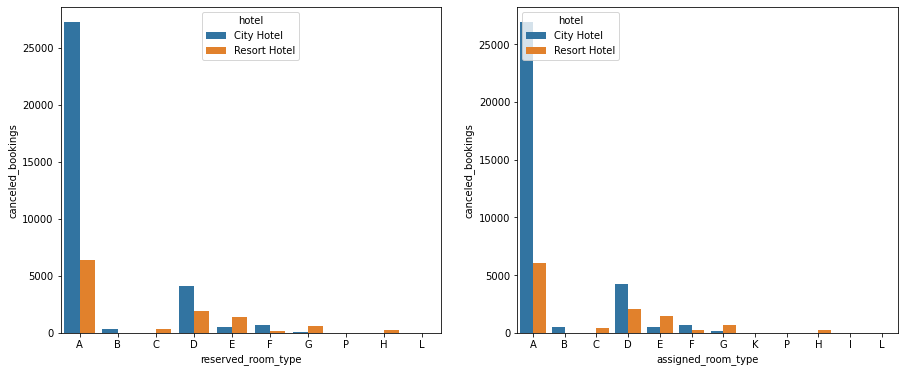

In [31]:
# reserved and assigned room type for CANCELED bookings

reserved_room_canc = pd.DataFrame(hotel_canceled_df.groupby(['hotel','reserved_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

assigned_room_canc = pd.DataFrame(hotel_canceled_df.groupby(['hotel','assigned_room_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

fig, axes1 = plt.subplots(1,2, figsize=(15,6))

sns.barplot(x = 'reserved_room_type', y='canceled_bookings', 
               hue = 'hotel',data=reserved_room_canc,ax=axes1[0]) #.set_xticklabels( rotation=30)

sns.barplot(x = 'assigned_room_type', y='canceled_bookings', 
               hue = 'hotel',data=assigned_room_canc ,ax=axes1[1]) #.set_xticklabels(rotation=30)

<Figure size 1440x360 with 0 Axes>

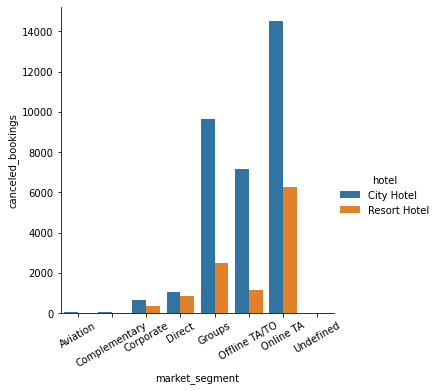

In [40]:
# market segmentation canceled

market_segment_canceled = pd.DataFrame(hotel_canceled_df.groupby(['hotel','market_segment']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

plt.figure(figsize = (20,5))
sns.catplot(x = 'market_segment', y='canceled_bookings', 
               hue = 'hotel',data=market_segment_canceled, kind='bar').set_xticklabels(rotation=30)

In [144]:
hotel_canceled_df.is_canceled.unique()

array([1])

Text(0.5, 1.0, 'Money deposit wise "canceled" bookings.')

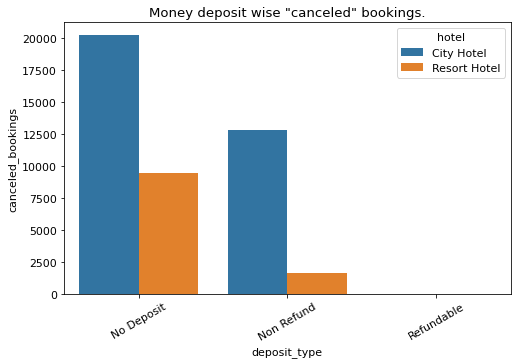

In [134]:
deposit_type_canceled_df = pd.DataFrame(hotel_canceled_df.groupby(['hotel','deposit_type']).agg({'is_canceled':'count'})).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

plt.figure(figsize = (8,5))
sns.barplot(x = 'deposit_type', y='canceled_bookings', 
               hue = 'hotel',data=deposit_type_canceled_df).set_xticklabels(deposit_type_canceled_df['deposit_type'],rotation=30)
plt.title('Money deposit wise "canceled" bookings.')

Text(0.5, 1.0, 'Market segment wise Non-Refund "CANCELED" bookings.\n Total non-refund cancellations: 14494')

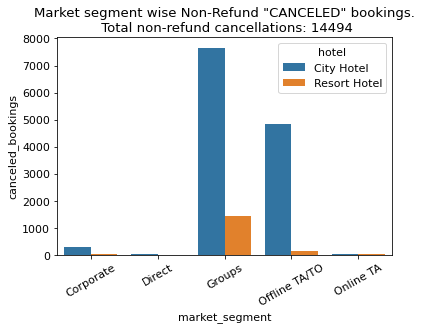

In [143]:
x = hotel_canceled_df[hotel_canceled_df['deposit_type'] == 'Non Refund'].groupby(['hotel','market_segment']).agg({'is_canceled':'count'}).reset_index().rename(columns = {'is_canceled':'canceled_bookings'})

sns.barplot(x = 'market_segment', y='canceled_bookings', 
               hue = 'hotel',data=x).set_xticklabels(x['market_segment'],rotation=30)
non_refund_canceled_booking = hotel_canceled_df[hotel_canceled_df['deposit_type'] == 'Non Refund'].shape[0]

plt.title('Market segment wise Non-Refund "CANCELED" bookings.\n Total non-refund cancellations: '+ str(non_refund_canceled_booking))

'YEAR-MONTH' WISE "DEMAND(CONFIRMED BOOKINGS)" and 'YEAR-MONTH' WISE "MEDIAN ADR":

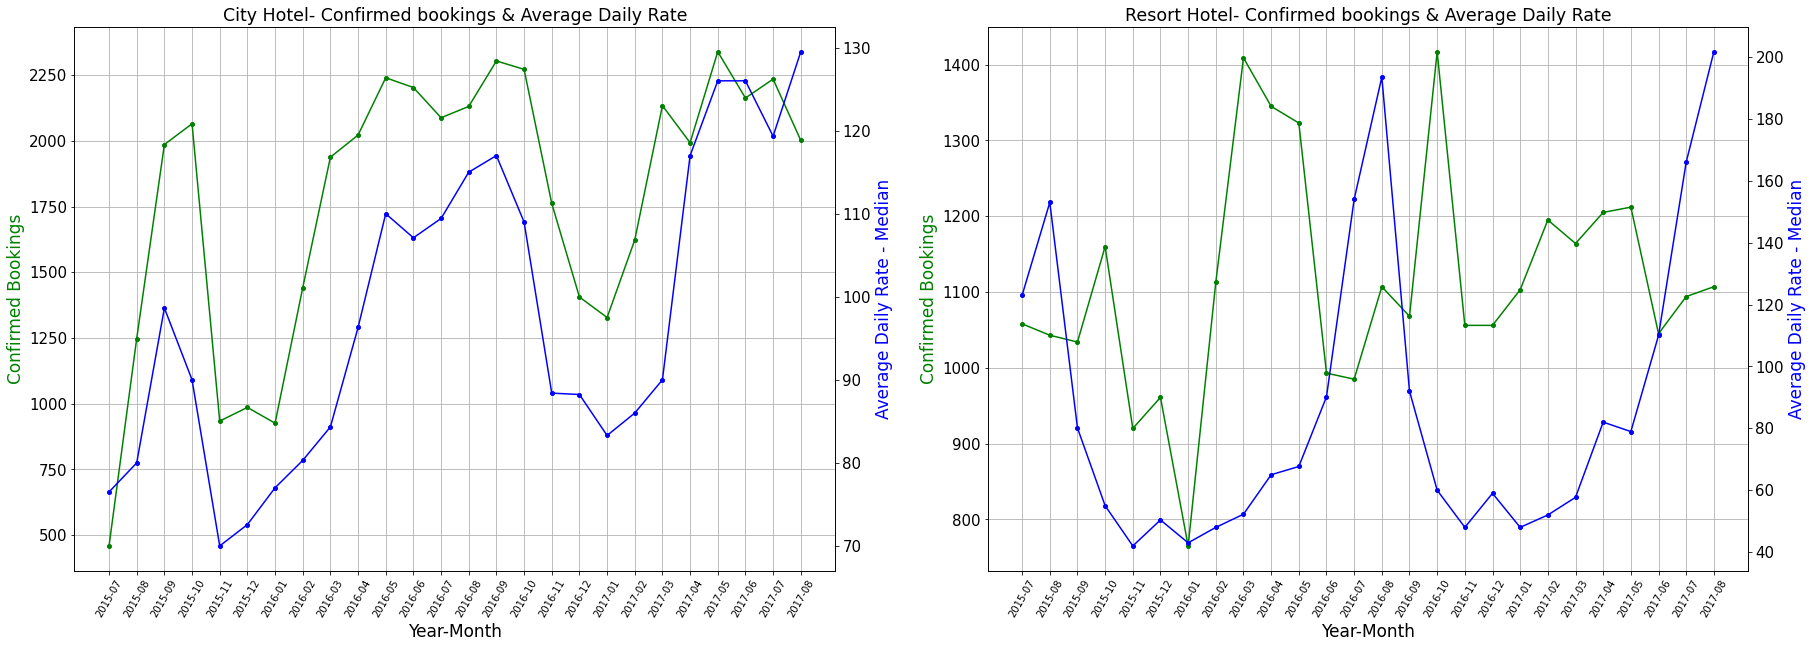

In [69]:
# WHICH HOTEL IS GETTING MORE CUSTOMERS DURING WHICH PERIOD OF YEAR

pd.set_option('display.max_rows', 100)
city_hotel_df = hotel_confirmed_df[ (hotel_confirmed_df['hotel'] == 'City Hotel')].groupby(by = ['hotel','arrival_month_year']).agg({'assigned_room_type':'count','adr':'median','total_nights':'sum'}).reset_index().rename(columns={'assigned_room_type':'total_non_canceled_customers','adr':'adr_median'})
city_hotel_df['arrival_month_year'] = city_hotel_df['arrival_month_year'].astype(str)

resort_hotel_df = hotel_confirmed_df[ (hotel_confirmed_df['hotel'] == 'Resort Hotel')].groupby(by = ['hotel','arrival_month_year']).agg({'assigned_room_type':'count','adr':'median','total_nights':'median','adults':'median','kids':'median'}).reset_index().rename(columns={'assigned_room_type':'total_non_canceled_customers','adr':'adr_median'})
resort_hotel_df['arrival_month_year'] = resort_hotel_df['arrival_month_year'].astype(str)


#city_hotel_df.plot.bar(x='arrival_month_year',y='total_non_canceled_customers')
fig, ax = plt.subplots(1,2,figsize = (30,10))
ax_city = ax[0].twinx()
ax[0].plot(city_hotel_df.arrival_month_year,city_hotel_df.total_non_canceled_customers,'g-o',markersize=4)
ax_city.plot(city_hotel_df.arrival_month_year,city_hotel_df.adr_median,'b-o',markersize=4)

mpl.rcParams['font.size'] = 14.5
ax[0].set_title('City Hotel- Confirmed bookings & Average Daily Rate')

ax[0].set_xlabel('Year-Month',fontsize = 17)

ax[0].set_xticklabels(city_hotel_df.arrival_month_year,rotation = 60)
ax[0].tick_params(axis="y", labelsize=15)
ax_city.tick_params(axis="y", labelsize=15)

ax[0].set_ylabel('Confirmed Bookings',fontsize = 17,color='g')
ax_city.set_ylabel('Average Daily Rate - Median',fontsize = 17,color='b')


ax[0].grid(True, which='both')


ax_resort = ax[1].twinx()
ax[1].plot(resort_hotel_df.arrival_month_year,resort_hotel_df.total_non_canceled_customers,'g-o',markersize=4)
ax_resort.plot(resort_hotel_df.arrival_month_year,resort_hotel_df.adr_median,'b-o',markersize=4)

ax[1].set_title('Resort Hotel- Confirmed bookings & Average Daily Rate')

ax[1].set_xlabel('Year-Month',fontsize = 17)

ax[1].set_xticklabels(resort_hotel_df.arrival_month_year,rotation = 60)
ax[1].tick_params(axis="y", labelsize=15)
ax_resort.tick_params(axis="y", labelsize=15)

ax[1].set_ylabel('Confirmed Bookings',fontsize = 17,color='g')
ax_resort.set_ylabel('Average Daily Rate - Median',fontsize = 17,color='b')


ax[1].grid(True, which='both')



In [116]:
hotel_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month_year,total_nights,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2015-07,0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2015-07,0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,2015-07,1,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,2015-07,1,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2015-07,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017-08-30,2017-08,7,0.0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017-08-31,2017-08,7,0.0
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017-08-31,2017-08,7,0.0
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017-08-31,2017-08,7,0.0
